In [1]:
from __future__ import print_function

import numpy as np
import yt
import unyt
from yt.units import *
from yt import YTArray
import argparse
import os
import glob
import sys
from astropy.table import Table
from astropy.io import ascii
import matplotlib.pyplot as plt
import random
from scipy import interpolate
#from photutils import detect_threshold, detect_sources, source_properties, EllipticalAperture
from scipy.interpolate import InterpolatedUnivariateSpline as IUS
from scipy.optimize import minimize
import trident
import ast
#import emcee
import numpy.random as rn
from multiprocessing import Pool
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap
from yt.units import kpc, cm
import cmasher as cmr

# These imports are FOGGIE-specific files
from foggie.utils.consistency import *
from foggie.utils.get_refine_box import get_refine_box
from foggie.utils.get_halo_center import get_halo_center
from foggie.utils.get_proper_box_size import get_proper_box_size
from foggie.utils.get_run_loc_etc import get_run_loc_etc
from foggie.utils.yt_fields import *
from foggie.utils.foggie_load import *
from foggie.utils.analysis_utils import *

# These imports for datashader plots
import datashader as dshader
from datashader.utils import export_image
import datashader.transfer_functions as tf
import pandas as pd
import matplotlib as mpl
import h5py
import pickle
import matplotlib.cm as mtcm
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D
from matplotlib import rcParams

from foggie.clumps.clump_finder.utils_diskproject import load_disk 
from collections import defaultdict
import pandas as pd
import math
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable


from foggie.clumps.clump_finder.utils_clump_finder import *
from foggie.clumps.clump_finder.clump_finder_argparser import *
from foggie.clumps.clump_finder.fill_topology import *
from foggie.clumps.clump_finder.clump_load import *
from foggie.clumps.clump_finder.clump_finder import clump_finder



/Users/vidasaeedzadeh/miniforge3/envs/foggie/lib/python3.12/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [19]:
def generate_foggie_paths(halo, run, snap):
    # Define base paths
    foggie_base_dir = "/Users/vidasaeedzadeh/Projects/foggie_data/"
    code_base_path = "/Users/vidasaeedzadeh/Projects/repositories/foggie/foggie/"
    output_base_dir = "/Users/vidasaeedzadeh/Projects/foggie_outputs/"

    # Zero-pad the halo number to 6 digits
    halo_number = halo.zfill(6)

    # Define directory and file paths dynamically
    foggie_dir = os.path.join(foggie_base_dir, f"halo_{halo_number}", run + '/')
    snap_name = os.path.join(foggie_dir, snap, snap)
    halo_c_v_name = os.path.join(code_base_path, f"halo_infos/{halo_number}/{run}/halo_c_v")
    trackname = os.path.join(code_base_path, f"halo_tracks/{halo_number}/nref11n_selfshield_15/halo_track_200kpc_nref9")

    # Output directory (adjust based on needs)
    output_dir = output_base_dir

    # Return paths
    return foggie_dir,code_base_path, snap_name, halo_c_v_name, trackname, output_dir

# specify halo and snapshot

halos = ['5036']#['2392','4123','5016','5036','8508']
run = 'nref11c_nref9f'#'ludicrous/nref11c_nref9f.enhance'
ions = ['CII','SiII','SiIII','SiIV','CIV','OVI']#['HI','CII','CIII','CIV','OVI','SiII','SiIII','SiIV','MgII']

orientations = ['face','edge']
regions = ['all']
cmap = mtcm.get_cmap('Set1', 10)  

box_name = 'refine_box'
resolutions = resolutions = [round(r, 2) for r in [i * 0.3 for i in range(1, int(6 / 0.3) + 1)]]
#bin_size_kpc = '0.27'
#instrument_list = ['JUNIPER','MAGPIE']
output = 'RD0031'#'RD0042'
snap = output
rvir_dict = { '2392':301,'4123':261,'5016':235,'5036':253,'8508':201}

def add_ion_fields(ds, ions):
    # Ensure ions is a list
    if isinstance(ions, str):
        ions = ions.split(',')  # Split the string into a list if necessary
    
    # Preprocess ions to ensure they are in the format expected by Trident
    formatted_ions = [trident_dict.get(ion, ion) for ion in ions]  # Replace using the dictionary if available
    
    # Add the formatted ions to the dataset
    trident.add_ion_fields(ds, formatted_ions)
    return ds


ions_number_density_dict = {'Lyalpha':'LyAlpha', 'HI':'H_p0_number_density', 'CII':'C_p1_number_density', 'CIII':'C_p2_number_density',
                                'CIV':'C_p3_number_density','OVI':'O_p5_number_density','SiII':'Si_p1_number_density','SiIII':'Si_p2_number_density',
                                 'SiIV':'Si_p3_number_density','MgII':'Mg_p1_number_density'}
trident_dict = { 'HI':'H I', 'CII':'C II','CIII':'C III',
                'CIV':'C IV','OVI':'O VI','SiII':'Si II','SiIII':'Si III','SiIV':'Si IV','MgII':'Mg II'}







/var/folders/03/8m_yf9p11xd_2mlw7w_4dw4w0000gn/T/ipykernel_29521/1658507798.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mtcm.get_cmap('Set1', 10)


Processing halo 5036


/var/folders/03/8m_yf9p11xd_2mlw7w_4dw4w0000gn/T/ipykernel_29521/884655535.py:71: RuntimeWarning: divide by zero encountered in log10
  log_cd_data = np.log10(cd_data)
/var/folders/03/8m_yf9p11xd_2mlw7w_4dw4w0000gn/T/ipykernel_29521/884655535.py:77: RuntimeWarning: divide by zero encountered in log10
  log_cd_data = np.log10(cd_data.reshape(X.shape))


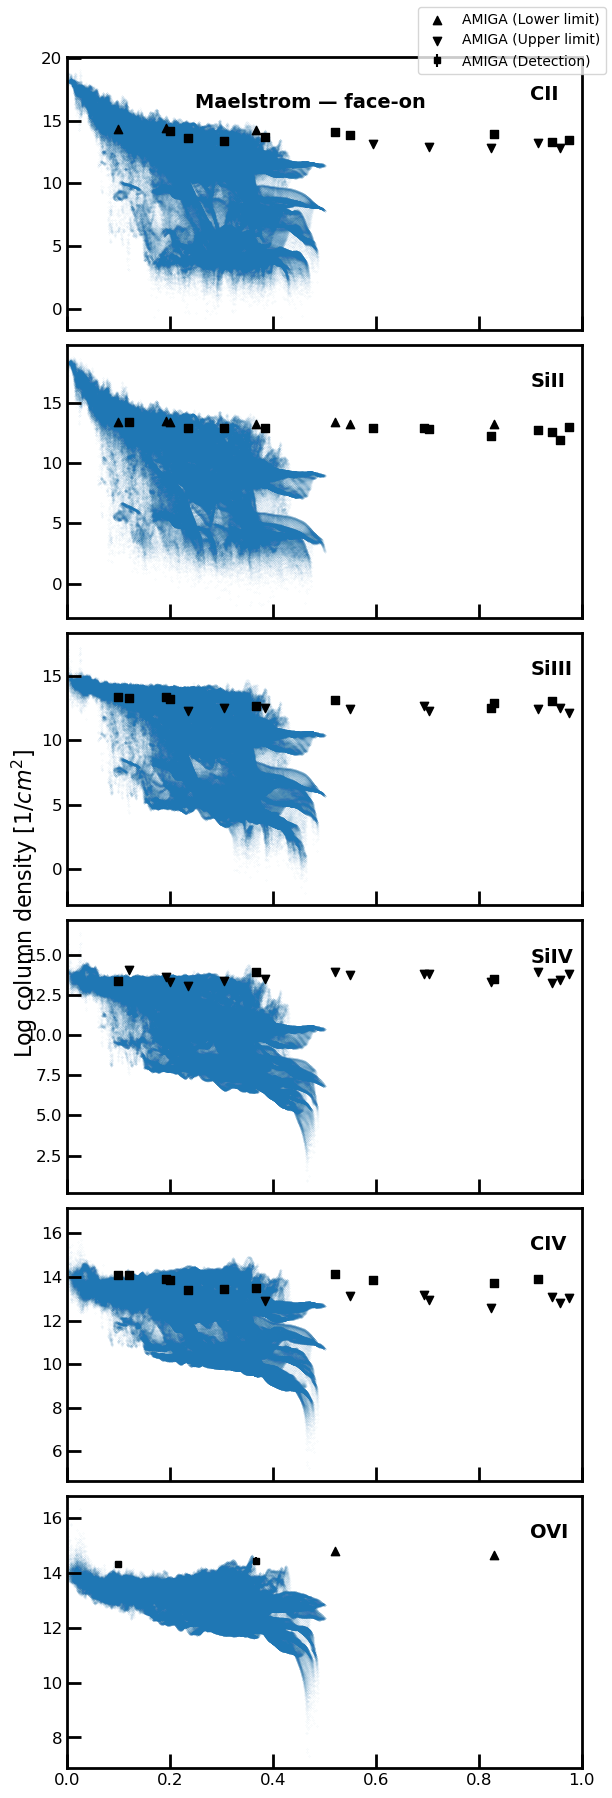

Processing halo 5036


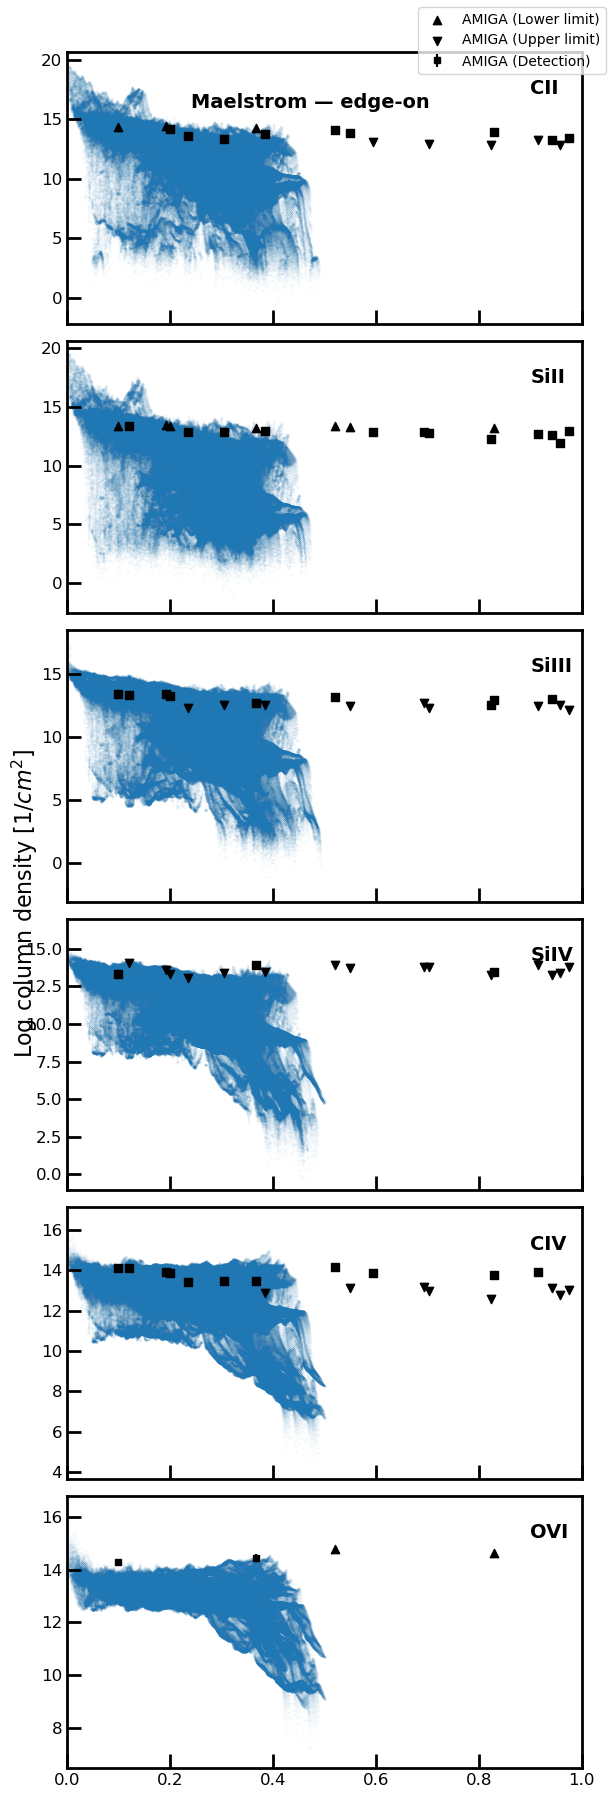

In [20]:

rcParams.update({'figure.autolayout': True})

# Load observational data
lehner_path = "/Users/vidasaeedzadeh/Projects/Observational_data/lehner2020"
with open(os.path.join(lehner_path, "Project_AMIGA_total.pkl"), "rb") as f:
    data = pickle.load(f, encoding="latin1")


ovi_obs_df = pd.read_csv(os.path.join(lehner_path, "ovi_vs_r_Rmax569_Rint569.ecsv"), comment='#', delimiter=' ')

obs_data = {
    'CII':   {'rho': data[1],  'logN': data[9],  'flag': data[12]},
    'CIV':   {'rho': data[14], 'logN': data[22], 'flag': data[25]},
    'SiII':  {'rho': data[40], 'logN': data[48], 'flag': data[51]},
    'SiIII': {'rho': data[53], 'logN': data[61], 'flag': data[64]},
    'SiIV':  {'rho': data[79], 'logN': data[87], 'flag': data[90]},
}



ovi_obs_data = {
    'rho': ovi_obs_df['Rho_kpc'].values,
    'logN': ovi_obs_df['logN_OVI'].values,
    'err_low': ovi_obs_df['logN_OVI_err_minus'].values,
    'err_high': ovi_obs_df['logN_OVI_err_plus'].values,
    'flag': ovi_obs_df['Flag'].values,
}


for orientation in orientations:
    for index,halo in enumerate(halos):
        print(f"Processing halo {halo}")

        halo_number = halo.zfill(6)
        halo_name = halo_dict[halo]
        Rvir = rvir_dict[halo]

        # base_dir = "/Users/vidasaeedzadeh/Projects/foggie_outputs/"
        # prefix = os.path.join(base_dir, f"plots_halo_00{halo}/{run}/FOGGIE/{output}/box_{box_name}/FRBs")
        # plot_dir = os.path.join(base_dir, "individual_halo_column_density_vs_r_plots")

        foggie_dir, code_path, snap_name, halo_c_v_name, trackname, output_dir = generate_foggie_paths(halo, run, snap)
        prefix = output_dir + '/' + 'plots_halo_00'+ halo + '/' + run +'/FOGGIE' + '/'+ output + '/' + 'box_' + box_name + '/' 
        plot_dir = os.path.join(prefix, 'FRBs')
        save_dir = output_dir + '/' + 'sim_obs_cd'
        os.makedirs(plot_dir, exist_ok=True)
        os.makedirs(save_dir, exist_ok=True)

        all_ions = ions
        num_ions = len(all_ions)
        cols = __builtins__.min(1, num_ions)
        rows = math.ceil(num_ions / cols)

        fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 3 * rows), squeeze=False, sharex=True)
        plt.suptitle(f"{halo_name} — {orientation}-on", fontsize=14, fontweight='bold', y=0.95)

        for ion_index, ion in enumerate(all_ions):
            row, col = divmod(ion_index, cols)
            ax = axes[row][col]

            for region in regions:
                file_path = os.path.join(plot_dir, f"{halo_name}_emission_maps.hdf5")

                with h5py.File(file_path, 'r') as f:
                    cd_dataset = f"z=0.6/{ion}_numdensity_{orientation}_{region}"
                    x_dataset = f"z=0.6/{ion}_x_{orientation}_{region}"
                    y_dataset = f"z=0.6/{ion}_y_{orientation}_{region}"

                    cd_data = np.array(f[cd_dataset]).flatten()
                    #cd_data = 10*cd_data
                    log_cd_data = np.log10(cd_data)
                    x_data = np.array(f[x_dataset]).flatten()
                    y_data = np.array(f[y_dataset]).flatten()

                    X, Y = np.meshgrid(x_data, y_data)
                    radius_map = np.sqrt(X**2 + Y**2)
                    log_cd_data = np.log10(cd_data.reshape(X.shape))

                ax.scatter(radius_map.ravel()/Rvir, log_cd_data.ravel(), marker='o', color=colors[index], s=0.01, alpha=0.2)

            # Overlay observational data
            if ion == 'OVI':
                rho = ovi_obs_data['rho'] / Rvir
                logN = ovi_obs_data['logN']
                err_low = ovi_obs_data['err_low']
                err_high = ovi_obs_data['err_high']
                flags = ovi_obs_data['flag']
                ax.errorbar(rho[flags == 0], logN[flags == 0], yerr=[err_low[flags == 0], err_high[flags == 0]], fmt='s', markersize=4, color='k', label='AMIGA (Detection)', zorder=10)
                ax.scatter(rho[flags == -2], logN[flags == -2], marker='^', color='k', label='AMIGA (Lower limit)', zorder=10)
                ax.scatter(rho[flags == -1], logN[flags == -1], marker='v', color='k', label='AMIGA (Upper limit)', zorder=10)

            elif ion in obs_data:
                # Ensure all arrays have same length
                # Ensure all arrays have the same length and convert to float
                
                min_len = __builtins__.min(len(obs_data[ion]['rho']), len(obs_data[ion]['logN']), len(obs_data[ion]['flag']))
                rho = np.array(obs_data[ion]['rho'][:min_len], dtype=np.float64) / Rvir
                logN = np.array(obs_data[ion]['logN'][:min_len], dtype=np.float64)
                flags = np.array(obs_data[ion]['flag'][:min_len], dtype=np.int64)



                ax.scatter(rho[flags == 0], logN[flags == 0], marker='s', color='k', label='AMIGA (Detection)', zorder=10)
                ax.scatter(rho[flags == -2], logN[flags == -2], marker='^', color='k', label='AMIGA (Lower limit)', zorder=10)
                ax.scatter(rho[flags == -1], logN[flags == -1], marker='v', color='k', label='AMIGA (Upper limit)', zorder=10)

            # if col == 0:
            #     ax.set_ylabel('')
            # if ion in ['SiII', 'SiIII', 'SiIV']:
            #     ax.set_ylim(11, 14)
            # else:
            #     ax.set_ylim(12, 15)
            # if row == rows - 1:
            #     ax.set_xlabel('R/Rvir', fontsize=14)
            # else:
            #     ax.set_xlabel('')

            ax.set_xlim(0,1)

            ax.text(0.9, 0.9, ion, transform=ax.transAxes, fontsize=14, fontweight='bold', ha='left', va='top')

            for spine in ax.spines.values():
                spine.set_linewidth(2)
                spine.set_color("k")
            ax.tick_params(axis='both', which='major', labelsize=12, length=10, width=2, color="k", direction='in')
            ax.tick_params(axis='both', which='minor', length=5, width=1, color="k", direction='in')

        handles, labels = ax.get_legend_handles_labels()
        if handles:
            fig.legend(handles, labels, loc='upper right', fontsize=10)

        #plt.tight_layout(rect=[0.05, 0, 1.2, 0.96])
        fig.text(0.0001, 0.5, 'Log column density [$1/cm^2$]', va='center', rotation='vertical', fontsize=16)

        plot_filename = f"{halo}_{orientation}_cd_r.png"
        plt.savefig(os.path.join(save_dir, plot_filename))
        plt.show()
        plt.close()


Processing halo 5036


/var/folders/03/8m_yf9p11xd_2mlw7w_4dw4w0000gn/T/ipykernel_29521/608746666.py:91: RuntimeWarning: divide by zero encountered in log10
  log_cd_data = np.log10(cd_data)
/var/folders/03/8m_yf9p11xd_2mlw7w_4dw4w0000gn/T/ipykernel_29521/608746666.py:97: RuntimeWarning: divide by zero encountered in log10
  log_cd_data = np.log10(cd_data.reshape(X.shape))


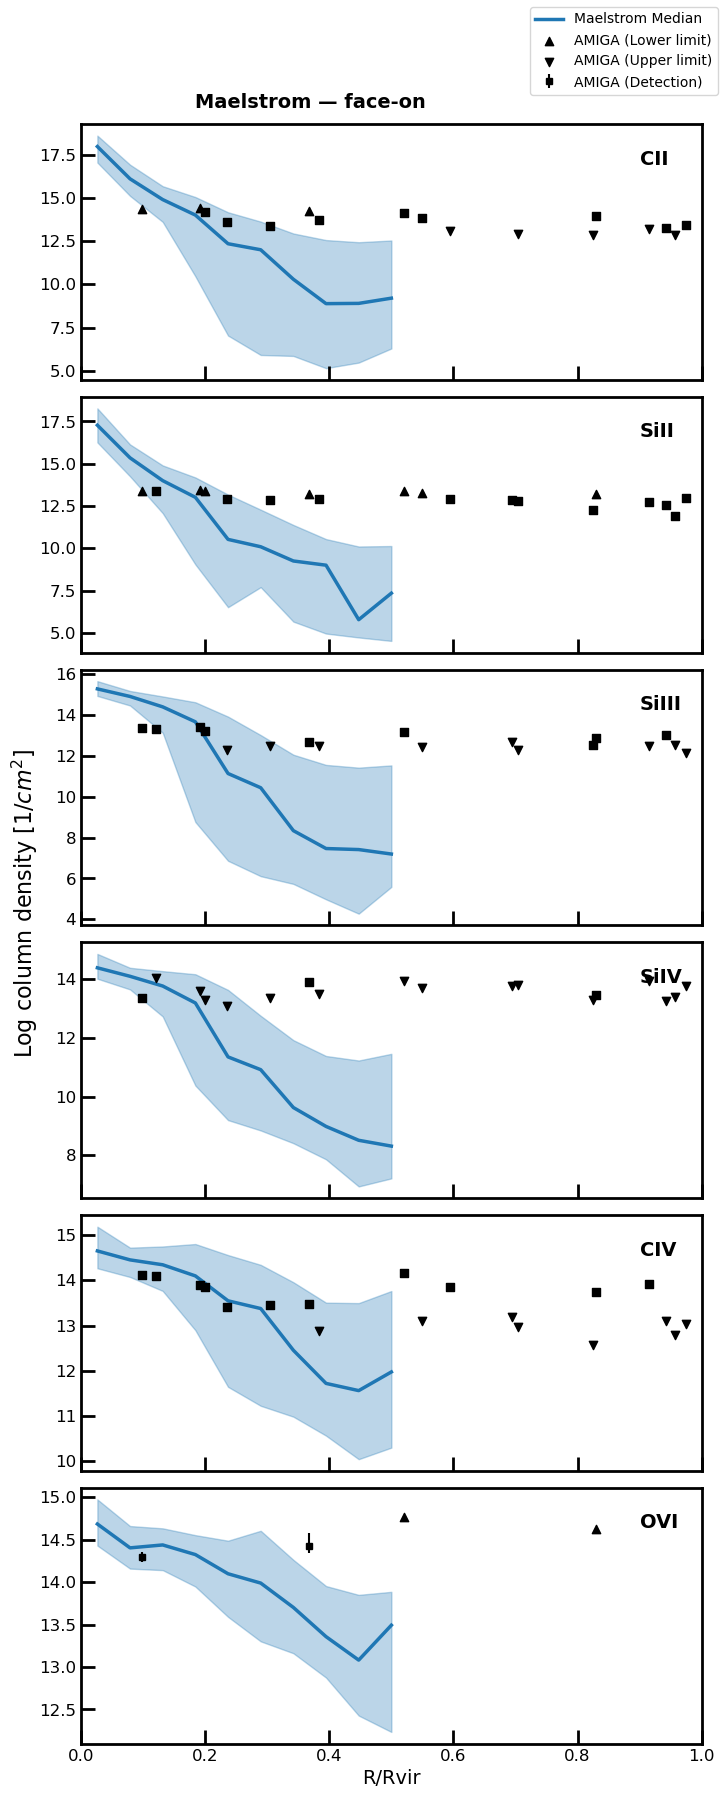

Processing halo 5036


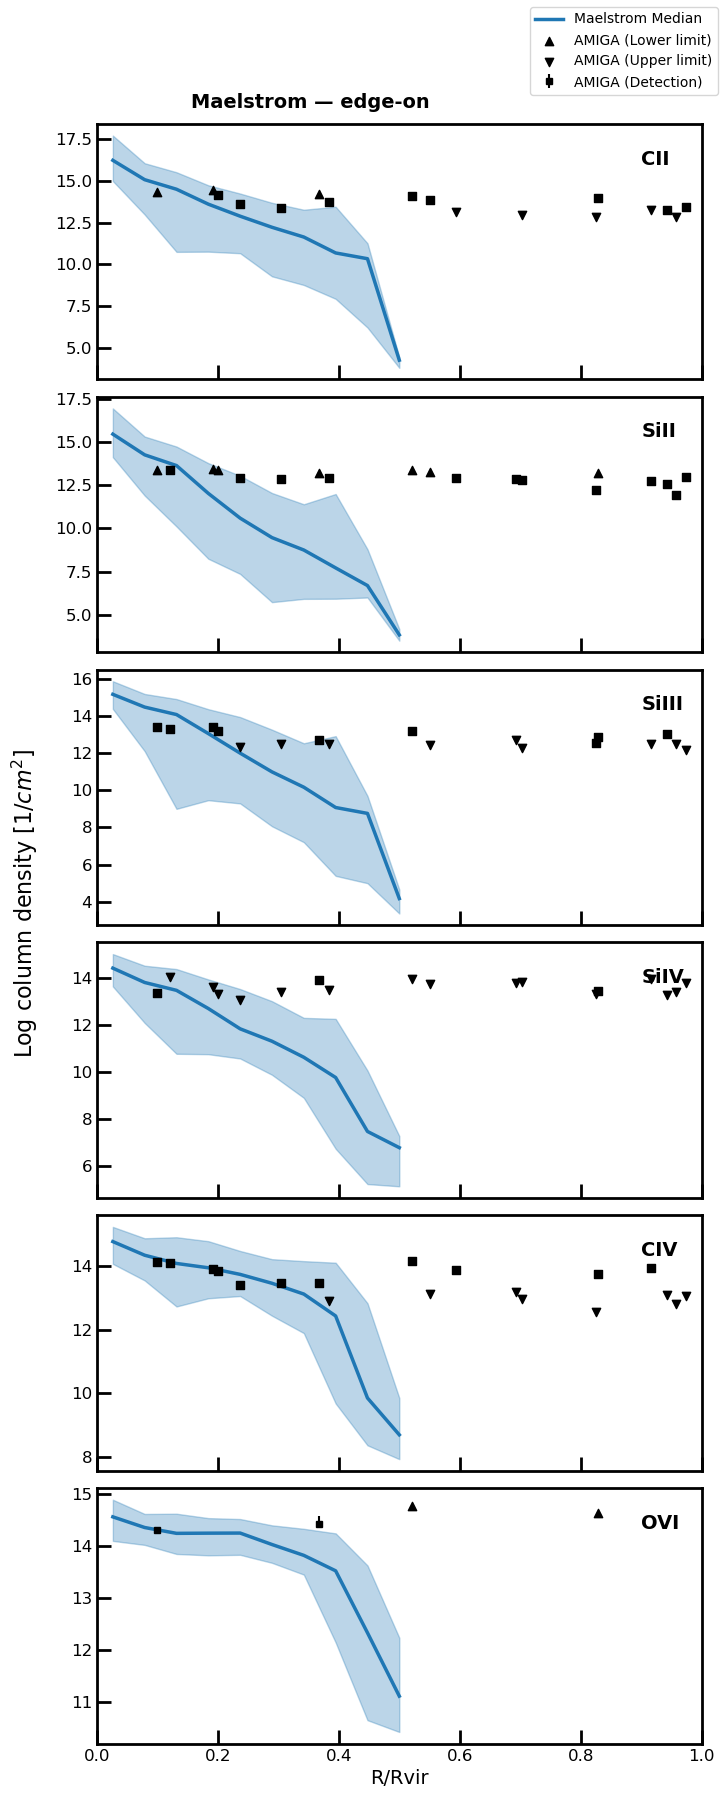

In [ ]:

rcParams.update({'figure.autolayout': True})

# Load observational data
lehner_path = "/Users/vidasaeedzadeh/Projects/Observational_data/lehner2020"
with open(os.path.join(lehner_path, "Project_AMIGA_total.pkl"), "rb") as f:
    data = pickle.load(f, encoding="latin1")


ovi_obs_df = pd.read_csv(os.path.join(lehner_path, "ovi_vs_r_Rmax569_Rint569.ecsv"), comment='#', delimiter=' ')

obs_data = {
    'CII':   {'rho': data[1],  'logN': data[9],  'flag': data[12]},
    'CIV':   {'rho': data[14], 'logN': data[22], 'flag': data[25]},
    'SiII':  {'rho': data[40], 'logN': data[48], 'flag': data[51]},
    'SiIII': {'rho': data[53], 'logN': data[61], 'flag': data[64]},
    'SiIV':  {'rho': data[79], 'logN': data[87], 'flag': data[90]},
}



ovi_obs_data = {
    'rho': ovi_obs_df['Rho_kpc'].values,
    'logN': ovi_obs_df['logN_OVI'].values,
    'err_low': ovi_obs_df['logN_OVI_err_minus'].values,
    'err_high': ovi_obs_df['logN_OVI_err_plus'].values,
    'flag': ovi_obs_df['Flag'].values,
}

# # Define halo plotting
# halos = ['2392','4123','5016','5036','8508']
# run = 'nref11c_nref9f'
# snap ='RD0042' 
# ions = ['CII','SiII','SiIII','SiIV','CIV','OVI']
# orientations = ['face','edge']
# regions = ['all']
# cmap = mtcm.get_cmap('Set1', 10)  
# box_name = 'refine_box'
# resolutions = [round(r, 2) for r in [i * 0.3 for i in range(1, int(6 / 0.3) + 1)]]
# output = 'RD0042'
# rvir_dict = { '2392':301,'4123':261,'5016':235,'5036':253,'8508':201}


# ions_number_density_dict = {'Lyalpha':'LyAlpha', 'HI':'H_p0_number_density', 'CII':'C_p1_number_density', 'CIII':'C_p2_number_density',
#     'CIV':'C_p3_number_density','OVI':'O_p5_number_density','SiII':'Si_p1_number_density','SiIII':'Si_p2_number_density',
#     'SiIV':'Si_p3_number_density','MgII':'Mg_p1_number_density'}
# trident_dict = { 'HI':'H I', 'CII':'C II','CIII':'C III','CIV':'C IV','OVI':'O VI','SiII':'Si II','SiIII':'Si III','SiIV':'Si IV','MgII':'Mg II'}

colors = plt.cm.tab10.colors

for orientation in orientations:
    for index,halo in enumerate(halos):
        print(f"Processing halo {halo}")

        halo_number = halo.zfill(6)
        halo_name = halo_dict[halo]
        Rvir = rvir_dict[halo]

        # base_dir = "/Users/vidasaeedzadeh/Projects/foggie_outputs/"
        # prefix = os.path.join(base_dir, f"plots_halo_00{halo}/{run}/FOGGIE/{output}/box_{box_name}/FRBs")
        # plot_dir = os.path.join(base_dir, "individual_halo_column_density_vs_r_plots")

        foggie_dir, code_path, snap_name, halo_c_v_name, trackname, output_dir = generate_foggie_paths(halo, run, snap)
        prefix = output_dir + '/' + 'plots_halo_00'+ halo + '/' + run +'/FOGGIE' + '/'+ output + '/' + 'box_' + box_name + '/' 
        plot_dir = os.path.join(prefix, 'FRBs')
        save_dir = output_dir + '/' + 'sim_obs_cd'
        os.makedirs(plot_dir, exist_ok=True)
        os.makedirs(save_dir, exist_ok=True)

        all_ions = ions
        num_ions = len(all_ions)
        cols = __builtins__.min(1, num_ions)
        rows = math.ceil(num_ions / cols)

        fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 3 * rows), squeeze=False, sharex=True)
        plt.suptitle(f"{halo_name} — {orientation}-on", fontsize=14, fontweight='bold', y=0.95)

        for ion_index, ion in enumerate(all_ions):
            row, col = divmod(ion_index, cols)
            ax = axes[row][col]

            for region in regions:
                file_path = os.path.join(plot_dir, f"{halo_name}_emission_maps.hdf5")

                with h5py.File(file_path, 'r') as f:
                    cd_dataset = f"z=0.6/{ion}_numdensity_{orientation}_{region}"
                    x_dataset = f"z=0.6/{ion}_x_{orientation}_{region}"
                    y_dataset = f"z=0.6/{ion}_y_{orientation}_{region}"

                    cd_data = np.array(f[cd_dataset]).flatten()
                    #cd_data = 10*cd_data
                    log_cd_data = np.log10(cd_data)
                    x_data = np.array(f[x_dataset]).flatten()
                    y_data = np.array(f[y_dataset]).flatten()

                    X, Y = np.meshgrid(x_data, y_data)
                    radius_map = np.sqrt(X**2 + Y**2)
                    log_cd_data = np.log10(cd_data.reshape(X.shape))

                    # Compute median and scatter in radial bins
                rvals = (radius_map.ravel() / Rvir)
                cdvals = log_cd_data.ravel()
                mask = np.isfinite(cdvals) & (rvals <= 1)

                bins = np.linspace(0, 1, 20)
                bin_centers = 0.5 * (bins[:-1] + bins[1:])
                medians = []
                p16 = []
                p84 = []

                for i in range(len(bins)-1):
                    in_bin = (rvals >= bins[i]) & (rvals < bins[i+1]) & mask
                    if np.any(in_bin):
                        vals = cdvals[in_bin]
                        medians.append(np.median(vals))
                        p16.append(np.percentile(vals, 16))
                        p84.append(np.percentile(vals, 84))
                    else:
                        medians.append(np.nan)
                        p16.append(np.nan)
                        p84.append(np.nan)

                medians = np.array(medians)
                p16 = np.array(p16)
                p84 = np.array(p84)

                # Plot median and scatter region
                ax.plot(bin_centers, medians, color=colors[index], lw=2.5, label=f'{halo_name} Median')
                ax.fill_between(bin_centers, p16, p84, color=colors[index], alpha=0.3)


                #ax.scatter(radius_map.ravel()/Rvir, log_cd_data.ravel(), marker='o', color=colors[index], s=0.1, alpha=0.5)

            # Overlay observational data
            if ion == 'OVI':
                rho = ovi_obs_data['rho'] / Rvir
                logN = ovi_obs_data['logN']
                err_low = ovi_obs_data['err_low']
                err_high = ovi_obs_data['err_high']
                flags = ovi_obs_data['flag']
                ax.errorbar(rho[flags == 0], logN[flags == 0], yerr=[err_low[flags == 0], err_high[flags == 0]], fmt='s', markersize=4, color='k', label='AMIGA (Detection)', zorder=10)
                ax.scatter(rho[flags == -2], logN[flags == -2], marker='^', color='k', label='AMIGA (Lower limit)', zorder=10)
                ax.scatter(rho[flags == -1], logN[flags == -1], marker='v', color='k', label='AMIGA (Upper limit)', zorder=10)

            elif ion in obs_data:
                # Ensure all arrays have same length
                # Ensure all arrays have the same length and convert to float
                
                min_len = __builtins__.min(len(obs_data[ion]['rho']), len(obs_data[ion]['logN']), len(obs_data[ion]['flag']))
                rho = np.array(obs_data[ion]['rho'][:min_len], dtype=np.float64) / Rvir
                logN = np.array(obs_data[ion]['logN'][:min_len], dtype=np.float64)
                flags = np.array(obs_data[ion]['flag'][:min_len], dtype=np.int64)



                ax.scatter(rho[flags == 0], logN[flags == 0], marker='s', color='k', label='AMIGA (Detection)', zorder=10)
                ax.scatter(rho[flags == -2], logN[flags == -2], marker='^', color='k', label='AMIGA (Lower limit)', zorder=10)
                ax.scatter(rho[flags == -1], logN[flags == -1], marker='v', color='k', label='AMIGA (Upper limit)', zorder=10)

            # if col == 0:
            #     ax.set_ylabel('')
            # if ion in ['SiII', 'SiIII', 'SiIV']:
            #     ax.set_ylim(11, 14)
            # else:
            #     ax.set_ylim(12, 15)
            if row == rows - 1:
                ax.set_xlabel('R/Rvir', fontsize=14)
            else:
                ax.set_xlabel('')

            ax.set_xlim(0,1)

            ax.text(0.9, 0.9, ion, transform=ax.transAxes, fontsize=14, fontweight='bold', ha='left', va='top')

            for spine in ax.spines.values():
                spine.set_linewidth(2)
                spine.set_color("k")
            ax.tick_params(axis='both', which='major', labelsize=12, length=10, width=2, color="k", direction='in')
            ax.tick_params(axis='both', which='minor', length=5, width=1, color="k", direction='in')

        handles, labels = ax.get_legend_handles_labels()
        if handles:
            fig.legend(handles, labels, loc='upper right', fontsize=10)

        plt.tight_layout(rect=[0.05, 0, 1.2, 0.96])
        fig.text(0.0001, 0.5, 'Log column density [$1/cm^2$]', va='center', rotation='vertical', fontsize=16)

        plot_filename = f"{halo}_{orientation}_cd_r.png"
        plt.savefig(os.path.join(save_dir, plot_filename))
        plt.show()
        plt.close()


In [ ]:


for orientation in orientations:
    cols = 1
    rows = math.ceil(len(ions) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 3 * rows), squeeze=False, sharex=True)
    #plt.suptitle(f"All halos — {orientation}-on", fontsize=16, fontweight='bold', y=0.95)

    for index, halo in enumerate(halos):
        halo_name = halo_dict[halo]
        Rvir = rvir_dict[halo]
        foggie_dir, code_path, snap_name, halo_c_v_name, trackname, output_dir = generate_foggie_paths(halo, run, snap)
        prefix = os.path.join(output_dir, f"plots_halo_00{halo}/{run}/FOGGIE/{output}/box_{box_name}/FRBs")
        plot_dir = os.path.join(output_dir, "sim_obs_cd")
        os.makedirs(plot_dir, exist_ok=True)

        for ion_index, ion in enumerate(ions):
            row, col = divmod(ion_index, cols)
            ax = axes[row][col]
            file_path = os.path.join(prefix, f"{halo_dict[halo]}_emission_maps.hdf5")

            with h5py.File(file_path, 'r') as f:
                cd_dataset = f"z=0.0/{ion}_numdensity_{orientation}_all"
                x_dataset = f"z=0.0/{ion}_x_{orientation}_all"
                y_dataset = f"z=0.0/{ion}_y_{orientation}_all"

                cd_data = np.array(f[cd_dataset]).flatten()
                log_cd_data = np.log10(cd_data)
                x_data = np.array(f[x_dataset]).flatten()
                y_data = np.array(f[y_dataset]).flatten()

                X, Y = np.meshgrid(x_data, y_data)
                radius_map = np.sqrt(X**2 + Y**2)
                log_cd_data = np.log10(cd_data.reshape(X.shape))

            rvals = radius_map.ravel() / Rvir
            cdvals = log_cd_data.ravel()
            mask = np.isfinite(cdvals) & (rvals <= 1)
            bins = np.linspace(0, 1, 20)
            bin_centers = 0.5 * (bins[:-1] + bins[1:])
            medians,means, p16, p84 = [], [], [], []

            for i in range(len(bins)-1):
                in_bin = (rvals >= bins[i]) & (rvals < bins[i+1]) & mask
                if np.any(in_bin):
                    vals = cdvals[in_bin]
                    medians.append(np.median(vals))
                    means.append(np.mean(vals))
                    p16.append(np.percentile(vals, 16))
                    p84.append(np.percentile(vals, 84))
                else:
                    medians.append(np.nan)
                    means.append(np.mean(np.nan))
                    p16.append(np.nan)
                    p84.append(np.nan)

            medians = np.array(medians)
            means = np.array(means)
            p16 = np.array(p16)
            p84 = np.array(p84)

            ax.plot(bin_centers, medians, color=colors[index], lw=2.5, label=f"{halo_name}")
            ax.plot(bin_centers, means, color=colors[index], lw=2.5, linestyle='dashed')
            ax.fill_between(bin_centers, p16, p84, color=colors[index], alpha=0.3)
            if halo == '8508':
                if ion == 'OVI':
                    rho = ovi_obs_data['rho'] / Rvir
                    logN = ovi_obs_data['logN']
                    err_low = ovi_obs_data['err_low']
                    err_high = ovi_obs_data['err_high']
                    flags = ovi_obs_data['flag']
                    ax.errorbar(rho[flags == 0], logN[flags == 0], yerr=[err_low[flags == 0], err_high[flags == 0]], fmt='s', markersize=4, color='k', label='AMIGA (Detection)', zorder=10)
                    ax.scatter(rho[flags == -2], logN[flags == -2], marker='^', color='k', label='AMIGA (Lower limit)', zorder=10)
                    ax.scatter(rho[flags == -1], logN[flags == -1], marker='v', color='k', label='AMIGA (Upper limit)', zorder=10)
                elif ion in obs_data:
                    min_len = __builtins__.min(len(obs_data[ion]['rho']), len(obs_data[ion]['logN']), len(obs_data[ion]['flag']))
                    rho = np.array(obs_data[ion]['rho'][:min_len], dtype=np.float64) / Rvir
                    logN = np.array(obs_data[ion]['logN'][:min_len], dtype=np.float64)
                    flags = np.array(obs_data[ion]['flag'][:min_len], dtype=np.int64)
                    ax.scatter(rho[flags == 0], logN[flags == 0], marker='s', color='k', label='AMIGA (Detection)', zorder=10)
                    ax.scatter(rho[flags == -2], logN[flags == -2], marker='^', color='k', label='AMIGA (Lower limit)', zorder=10)
                    ax.scatter(rho[flags == -1], logN[flags == -1], marker='v', color='k', label='AMIGA (Upper limit)', zorder=10)

            ax.set_xlim(0, 1)
            if row == rows - 1:
                ax.set_xlabel('R/Rvir', fontsize=14)
            ax.text(0.9, 0.9, ion, transform=ax.transAxes, fontsize=14, fontweight='bold', ha='left', va='top')
            for spine in ax.spines.values():
                spine.set_linewidth(2)
                spine.set_color("k")
            ax.tick_params(axis='both', which='major', labelsize=12, length=10, width=2, color="k", direction='in')
            ax.tick_params(axis='both', which='minor', length=5, width=1, color="k", direction='in')

    handles, labels = axes[0][0].get_legend_handles_labels()
    if handles:
        fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.95, 0.9), fontsize=10)
    fig.text(0.0001, 0.5, 'Log column density [$1/cm^2$]', va='center', rotation='vertical', fontsize=16)
    fig.tight_layout(rect=[0.05, 0.01, 1, 0.96])

    plot_filename = f"allhalos_{orientation}_cd_r.png"
    plt.savefig(os.path.join(save_dir, plot_filename), bbox_inches='tight')
    plt.show()
    plt.close()
